{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


Best Parameters
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60}
-0.11031911083043063
Mean Squared
0.17323865954234557
Mean Absolute
0.3059536774050774
Variance
-0.07308175698947683
-0.07308175698947683
Rscore
-0.21323368257545972
-0.21323368257545972
Score
-0.21323368257545972
Feature importance


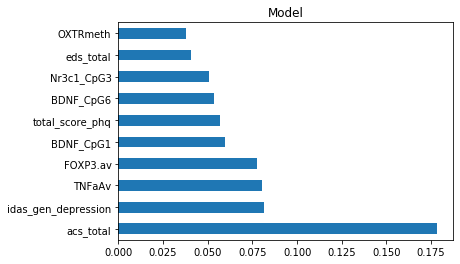

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

def evaluate(model, test_features, test_labels):
    predicted = model.predict(test_features)
    mean_squared = mean_squared_error(test_labels, predicted)
    mean_absolute = mean_absolute_error(test_labels, predicted)
    variance = explained_variance_score(test_labels, predicted)
    _variance = explained_variance_score(test_labels, predicted, multioutput='variance_weighted')
    rscore = r2_score(test_labels, predicted)
    _weighted = r2_score(test_labels, predicted, multioutput='variance_weighted')
    print('Mean Squared')
    print(mean_squared)
    print('Mean Absolute')
    print(mean_absolute)
    print('Variance')
    print(variance)
    print(_variance)
    print('Rscore')
    print(rscore)
    print(_weighted)

    print('Score')
    print(model.score(test_features, test_labels))
    print('Feature importance')
    feat_importances = pd.Series(model.feature_importances_, index=test_features.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Model')
    plt.show()


# read prenatal_features.csv
df = pd.read_csv('premature_birth/prenatal_features.csv')
df = df.replace('#NULL!', np.nan)
df = df.dropna(how='any')
plt.show()
df_all = df


# just psychological
prenatal_features = ['total_score_phq', 'epds_score', 'idas_total', 'idas_gen_depression',
                     'idas_dysphoria', 'idas_lassitude', 'idas_suicidality', 'idas_appet_gain', 'idas_appet_loss', 'idas_well_being',
                     'idas_ill_temper', 'idas_mania', 'idas_euphoria', 'idas_panic', 'idas_social_anxiety',
                     'idas_claustrohobia', 'idas_traumatic_intrusions', 'idas_traumatic_avoidance', 'idas_checking', 'idas_cleaning',
                     'idas_ordering', 'total_score_gad_7', 'bas_total', 'acs_total', 'eds_total', 'ehm_total', 'TNFaAv', 'FOXP3.av']

df_psychological = df[prenatal_features]

# stress genes
stress_genes = ['bas_total', 'acs_total', 'BDNF_CpG1', 'BDNF_CpG2', 'BDNF_CpG3', 'BDNF_CpG4', 'BDNF_CpG5', 'BDNF_CpG6', 'BDNF_CpG7',
                'FKBP5_CpG1', 'FKBP5_CpG2', 'Nr3c1_CpG1', 'Nr3c1_CpG2', 'Nr3c1_CpG3', 'Nr3c1_CpG4', 'TNFa1', 'TNFa2', 'TNFa3', 'TNFa4', 'TNFa5', 'FOXP3.1', 'FOXP3.2', 'FOXP3.3', 'FOXP3.4', 'FOXP3.5', 'FOXP3.6',
                     'FOXP3.7', 'OXTRmeth', 'total_score_gad_7', 'idas_total']
df_stress = df_all[stress_genes]


all_df = [df_stress]


analysis_features = ['acs_total', 'FOXP3.1','FOXP3.2','FOXP3.3','FOXP3.7', 'BDNF_CpG1', 'BDNF_CpG4', 'BDNF_CpG5', 'BDNF_CpG6', 'OXTRmeth', 'FKBP5_CpG2', 'total_score_gad_7']
df_acculturation = df_all[analysis_features]
# experiment_features = ['acs_total','bas_total', 'BDNF_CpG1', 'BDNF_CpG2', 'BDNF_CpG3', 'BDNF_CpG4', 'BDNF_CpG5', 'BDNF_CpG6', 'BDNF_CpG7',
#                 'FKBP5_CpG1', 'FKBP5_CpG2', 'Nr3c1_CpG1', 'Nr3c1_CpG2', 'Nr3c1_CpG3', 'Nr3c1_CpG4', 'TNFa1', 'TNFa2', 'TNFa3', 'TNFa4', 'TNFa5', 'FOXP3.1', 'FOXP3.2', 'FOXP3.3', 'FOXP3.4', 'FOXP3.5', 'FOXP3.6',
#                      'FOXP3.7', 'OXTRmeth', 'idas_gen_depression', 'total_score_phq', 'eds_total', 'ehm_total', 'total_score_gad_7']

experiment_features = ['acs_total','bas_total', 'BDNF_CpG1', 'BDNF_CpG2', 'BDNF_CpG3', 'BDNF_CpG4', 'BDNF_CpG5', 'BDNF_CpG6', 'BDNF_CpG7',
                'FKBP5_CpG1', 'FKBP5_CpG2', 'Nr3c1_CpG1', 'Nr3c1_CpG2', 'Nr3c1_CpG3', 'Nr3c1_CpG4', 'TNFaAv', 'FOXP3.av', 'OXTRmeth', 'idas_gen_depression', 'total_score_phq', 'eds_total', 'ehm_total', 'total_score_gad_7']

df_bas = df_all[experiment_features]

# df_bas['BDNF_CpGavg'] = df_bas[['BDNF_CpG1', 'BDNF_CpG2', 'BDNF_CpG3', 'BDNF_CpG4', 'BDNF_CpG5', 'BDNF_CpG6', 'BDNF_CpG7']].mean()
# df_bas = df_bas.drop(['BDNF_CpG1', 'BDNF_CpG2', 'BDNF_CpG3', 'BDNF_CpG4', 'BDNF_CpG5', 'BDNF_CpG6', 'BDNF_CpG7'], axis = 1)

# Number of boosting stages to perform
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#                'bootstrap': bootstrap}
print(random_grid)


X_bas = df_bas.drop(['bas_total'], axis=1)
y_bas = df_bas['bas_total']
X_all_bas, X_test_all_bas, y_all_bas, y_test_all_bas = train_test_split(X_bas, y_bas, test_size=0.2, random_state=1)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = GradientBoostingRegressor()
# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=10,
                               verbose=2, random_state=42, n_jobs=-1, return_train_score=True, refit=True)
# Fit the random search model
rf_random.fit(X_all_bas, y_all_bas)
print('Best Parameters')
print(rf_random.best_params_)
print(rf_random.best_score_)

best_random = rf_random.best_estimator_

evaluate(best_random, X_test_all_bas, y_test_all_bas)